In [101]:
import matplotlib.pyplot as plt

import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import datasets

from ulf.technique.autoencoder import Autoencoder



In [81]:
encoder = keras.Sequential()
encoder.add(layers.InputLayer(784))
for units in [1000, 500, 250]:
    encoder.add(layers.Dense(units, activation="relu"))
encoder.add(layers.Dense(8, activation="linear"))

decoder = keras.Sequential()
decoder.add(layers.InputLayer(8))
for units in [250, 500, 1000]:
    decoder.add(layers.Dense(units, activation="relu"))
decoder.add(layers.Dense(784, activation="sigmoid"))


#model.build()
#model.summary()
autoencoder = Autoencoder(encoder, decoder)

In [36]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [82]:
autoencoder.compile()

In [96]:
autoencoder.fit(x_train.reshape(x_train.shape[0], 784)/255, x_test.reshape(x_test.shape[0], 784)/255, epochs=16)

Epoch 1/16
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 2/16
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0148 - val_loss: 0.0158
Epoch 3/16
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0144 - val_loss: 0.0151
Epoch 4/16
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0141 - val_loss: 0.0149
Epoch 5/16
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0139 - val_loss: 0.0148
Epoch 6/16
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0136 - val_loss: 0.0149
Epoch 7/16
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0134 - val_loss: 0.0146
Epoch 8/16
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0133 - val_loss: 0.0147
Epoch 9/16
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0131 - val_loss: 0.0145
Epoch 10/16
1875/1875 [==============================] - 41s 22m

In [118]:
ground_thru = x_test[:16].reshape(16, 784)/255
pred = autoencoder.model.predict(ground_thru/2+x_test[1:17].reshape(16, 784)/500)

In [106]:
pred

array([[3.5791754e-35, 8.6820365e-35, 4.4072290e-37, ..., 7.2462344e-34,
        9.5148994e-34, 5.0274399e-36],
       [1.0316797e-24, 1.6142664e-25, 1.6395365e-26, ..., 9.8379419e-24,
        7.0308869e-24, 2.0875182e-25],
       [1.0049387e-34, 8.0393172e-35, 5.8959267e-37, ..., 2.3735753e-33,
        2.1499983e-33, 1.4276461e-35],
       ...,
       [3.8897375e-29, 6.9939797e-29, 1.2553245e-30, ..., 4.3865683e-28,
        6.2629123e-28, 1.0061419e-29],
       [3.4126085e-32, 5.3755498e-32, 3.2890392e-34, ..., 4.9088376e-31,
        6.3769337e-31, 6.2613676e-33],
       [1.4342382e-30, 5.8592638e-31, 1.5165095e-32, ..., 1.9457324e-29,
        1.8726208e-29, 2.1827919e-31]], dtype=float32)

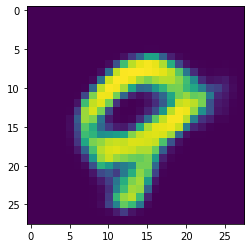

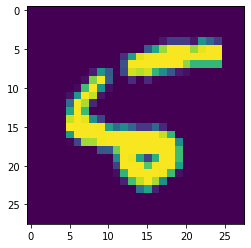

In [119]:
#plt.imshow(pred[0].reshape(28,28))
plt.figure()
plt.imshow(pred[8].reshape(28,28))
plt.figure()
plt.imshow(ground_thru[8].reshape(28,28))